<a href="https://colab.research.google.com/github/Ibilis37/APS-reborn/blob/master/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Чтение CSV файла в DataFrame
df = pd.read_csv('Fraud.csv')

In [ ]:
display(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0
14245,8,PAYMENT,11465.21,C1837637612,38.0,0.00,M1222093409,0.0,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


Доля мошеннических транзакций: 0.005475221114698863


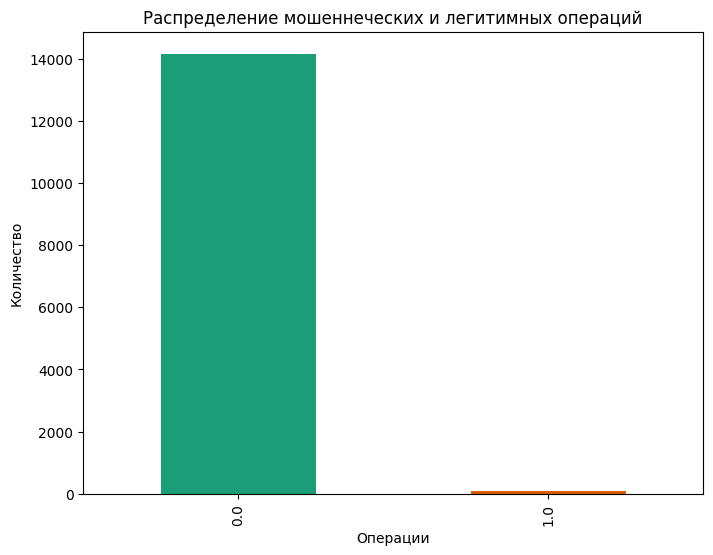

In [ ]:
# Доля мошеннеческих операций
print('Доля мошеннических транзакций:', df['isFraud'].mean())

# Количество мошеннических и легетимных операций
plt.figure(figsize=(8, 6))
df['isFraud'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение мошеннеческих и легитимных операций')
plt.xlabel('Операции')
plt.ylabel('Количество')
plt.show()

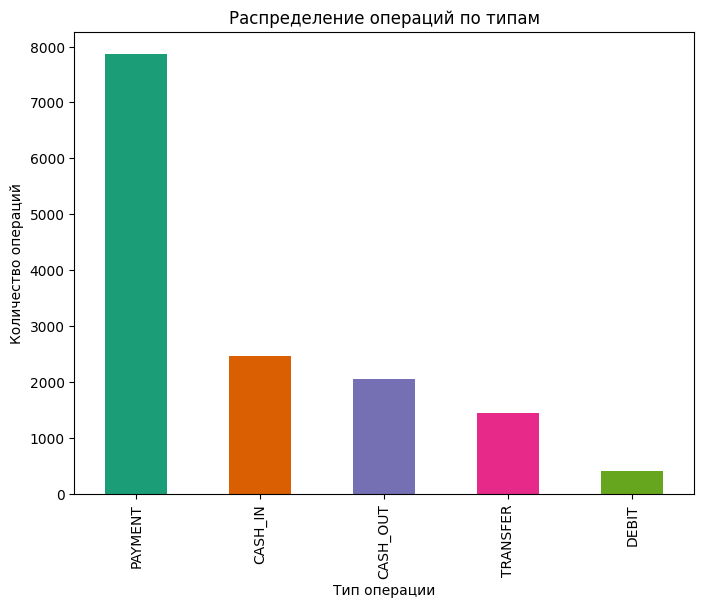

In [ ]:
# Количество операций по типам
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Распределение операций по типам')
plt.xlabel('Тип операции')
plt.ylabel('Количество операций')
plt.show()

               df     sum_sq   mean_sq          F        PR(>F)
C(type)       4.0   1.356073  0.339018  63.345029  3.643417e-53
Residual  14241.0  76.216860  0.005352        NaN           NaN


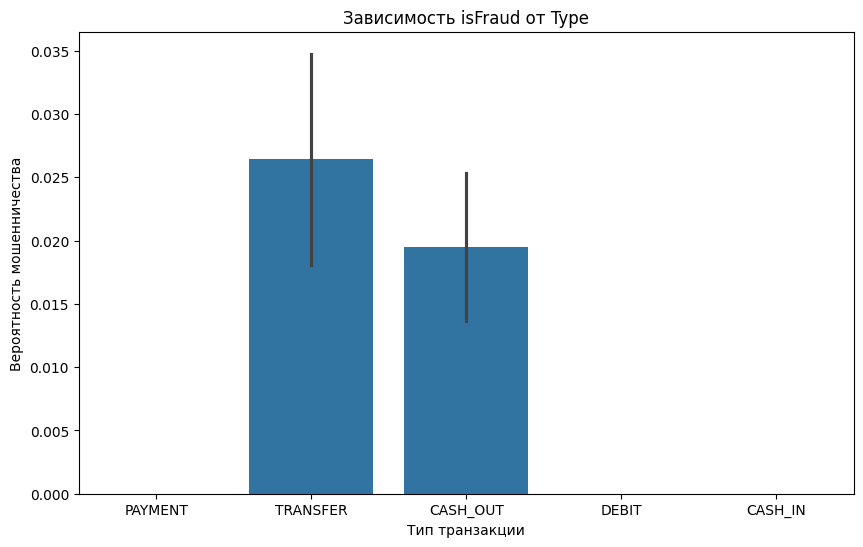

In [ ]:
# Анализ зависимости между Type и isFraud
model = ols('isFraud ~ C(type)', data=df).fit()
anova_results = anova_lm(model)
print(anova_results)

# Визуализация зависимости
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='isFraud', data=df)
plt.title('Зависимость isFraud от Type')
plt.xlabel('Тип транзакции')
plt.ylabel('Вероятность мошенничества')
plt.show()

**Как видим, все мошеннические операции связаны только с переводами и снятием наличных**

In [ ]:
df['nameOrig'].value_counts()

,count
nameOrig,
C1231006815,1
C269307928,1
C1940245575,1
C1353474994,1
C1222626908,1
...,...
C1690893563,1
C420502151,1
C733419479,1


**Каждое значение в столбце nameOrig уникально**

In [ ]:
df['nameDest'].value_counts()

,count
nameDest,
C985934102,64
C1590550415,54
C1286084959,53
C977993101,48
C248609774,47
...,...
M1322359657,1
M492135521,1
M2009885224,1


**Слишком много уникальных значений**

<Figure size 800x600 with 0 Axes>

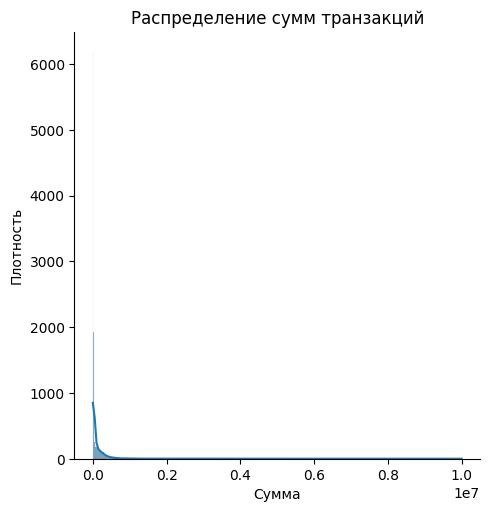

In [ ]:
plt.figure(figsize=(8, 6))
sns.displot(df['amount'], kde=True)
plt.title('Распределение сумм транзакций')
plt.xlabel('Сумма')
plt.ylabel('Плотность')
plt.show()

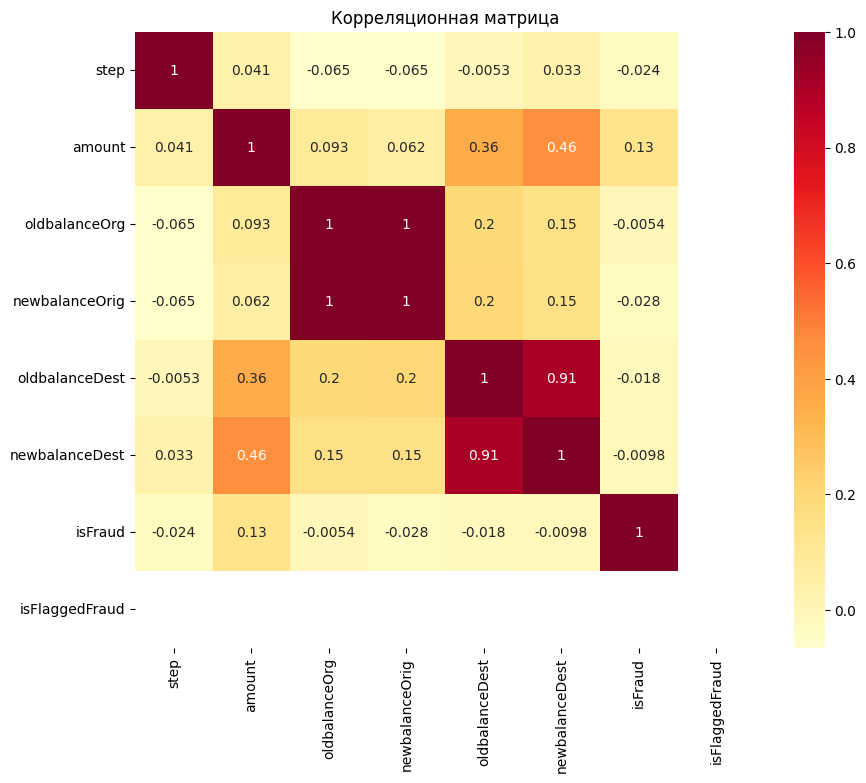

In [ ]:
# Корреляционный анализ
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlOrRd')
plt.title('Корреляционная матрица')
plt.show()

**Среди численных данных наибольшая зависимость типа операции по критерию мошенничества (isFraud) наблюдается от суммы операции (amount)**

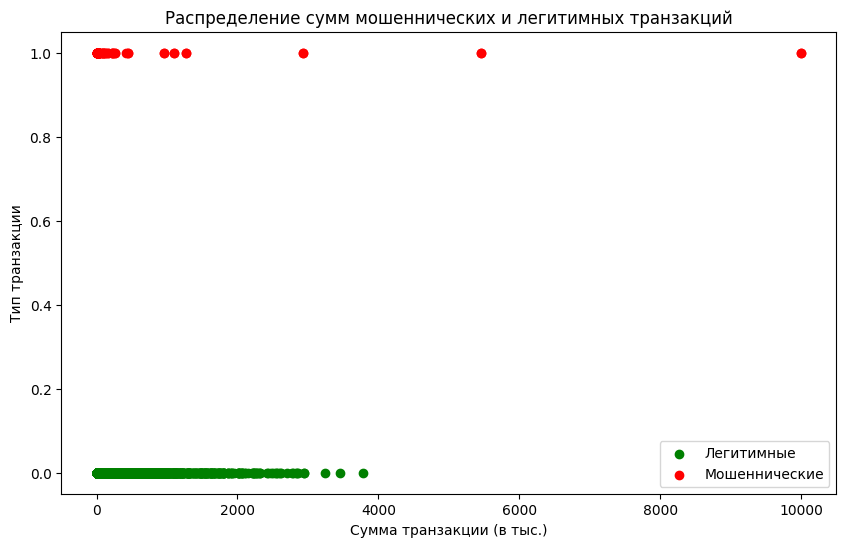

In [ ]:
plt.figure(figsize=(10, 6))
df_legit = df[df['isFraud'] == 0]
df_fraud = df[df['isFraud'] == 1]
plt.scatter(df_legit['amount'] / 1000, df_legit['isFraud'], c='green', label='Легитимные')
plt.scatter(df_fraud['amount'] / 1000, df_fraud['isFraud'], c='red', label='Мошеннические')
plt.xlabel('Сумма транзакции (в тыс.)')
plt.ylabel('Тип транзакции')
plt.title('Распределение сумм мошеннических и легитимных транзакций')
plt.legend()

In [ ]:
df.isnull().any()

,0
step,False
type,False
amount,False
nameOrig,False
oldbalanceOrg,True
newbalanceOrig,True
nameDest,True
oldbalanceDest,True
newbalanceDest,True
isFraud,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df = df.drop(df[pd.isnull(df['oldbalanceOrg'])].index)
df = df.drop(df[pd.isnull(df['newbalanceOrig'])].index)
df = df.drop(df[pd.isnull(df['nameDest'])].index)
df = df.drop(df[pd.isnull(df['oldbalanceDest'])].index)
df = df.drop(df[pd.isnull(df['isFraud'])].index)
df = df.drop(df[pd.isnull(df['isFlaggedFraud'])].index)

In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,14246


In [ ]:
del df['step']
del df['isFlaggedFraud']

In [ ]:
del df['nameOrig']
del df['nameDest']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14246 entries, 0 to 14245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            14246 non-null  object 
 1   amount          14246 non-null  float64
 2   oldbalanceOrg   14246 non-null  float64
 3   newbalanceOrig  14246 non-null  float64
 4   oldbalanceDest  14246 non-null  float64
 5   newbalanceDest  14246 non-null  float64
 6   isFraud         14246 non-null  float64
dtypes: float64(6), object(1)
memory usage: 779.2+ KB


In [ ]:
column_names = ['type']
for i in column_names:
  df[i] = pd.factorize(df[i])[0]

In [ ]:
df = df.reset_index(drop=True)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,0,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,181.00,181.0,0.00,0.0,0.0,1.0
3,2,181.00,181.0,0.00,21182.0,0.0,1.0
4,0,11668.14,41554.0,29885.86,0.0,0.0,0.0


<Axes: >

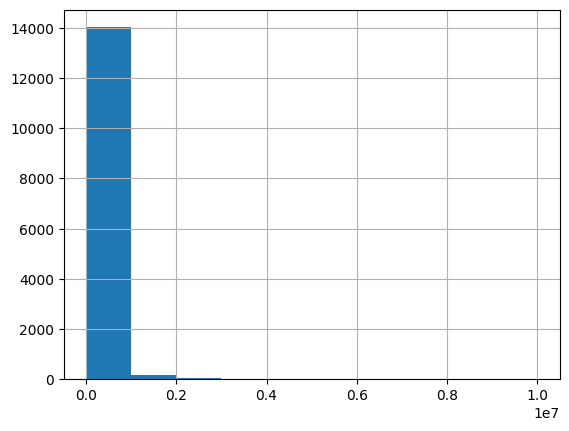

In [ ]:
df['amount'].hist()

(14176, 7)


<Axes: >

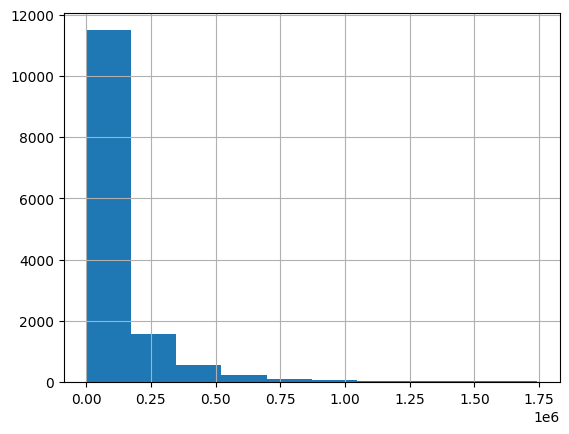

In [ ]:
df = df[df['amount'] < 1.75e6] # оставим только те строки, где значение цены меньше 8 000 000
print(df.shape) # выведем размер отфильтрованного дата сета (кол-во строк, кол-во столбцов), как видим, количество строк сократится
df['amount'].hist() # построим диаграмму

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14176 entries, 0 to 14245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            14176 non-null  int64  
 1   amount          14176 non-null  float64
 2   oldbalanceOrg   14176 non-null  float64
 3   newbalanceOrig  14176 non-null  float64
 4   oldbalanceDest  14176 non-null  float64
 5   newbalanceDest  14176 non-null  float64
 6   isFraud         14176 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 886.0 KB


In [ ]:
Y = df['isFraud']
X = df.drop(['isFraud'], axis = 1)
train_points, test_points, train_values, test_values = train_test_split(X, Y, test_size = 0.2)

In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [ ]:
xg_reg.fit(train_points, train_values)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
xgb_predict = xg_reg.predict(test_points)

In [ ]:
print(mean_absolute_error(test_values, xgb_predict))

0.012093405012483767


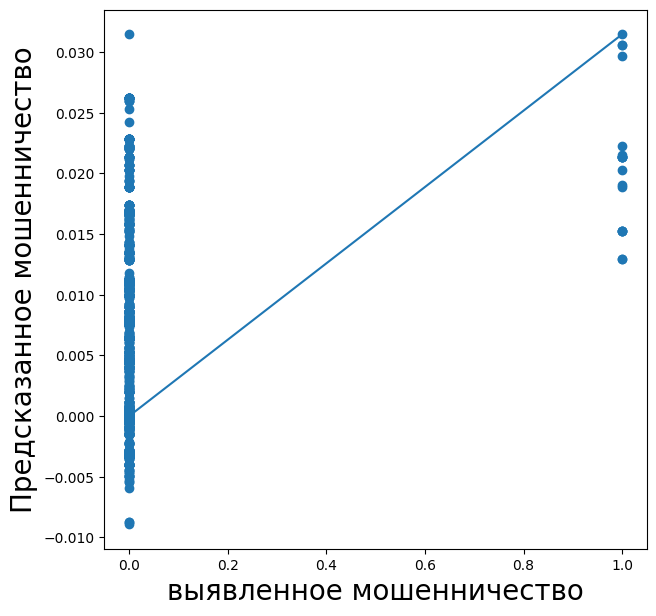

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(test_values, xgb_predict) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(xgb_predict)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('выявленное мошенничество', fontsize=20)
plt.ylabel('Предсказанное мошенничество', fontsize=20);

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(train_points, train_values)

RandomForestRegressor(n_estimators=50)

In [ ]:
rf_predict = rf_model.predict(test_points)
print(mean_absolute_error(test_values, rf_predict))

0.003141951391334978


In [ ]:
nn_model = Sequential()
nn_model.add(Dense(9, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(15, activation='relu'))
nn_model.add(Dense(1, activation='linear'))

nn_model.compile(loss='mean_absolute_error', optimizer='adam')

results = nn_model.fit(
 train_points, train_values,
 epochs= 10,
 batch_size = 1000,
 validation_data = (test_points, test_values)
)

NameError: name 'Sequential' is not defined